In [ ]:
!pip install streamlit
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import streamlit as st
import cv2
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split
import matplotlib.image as mimg
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
!pip install opendatasets
import opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
opendatasets.download("https://www.kaggle.com/datasets/harbhajansingh21/german-traffic-sign-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohithsrivaishnav
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harbhajansingh21/german-traffic-sign-dataset


100%|██████████| 118M/118M [00:05<00:00, 21.2MB/s]


In [ ]:
# The dataset is split into a folder containing the images divided into subdirectories by class, and
# a csv file containing the labels for each subdirectory.
label_df = pd.read_csv('/content/german-traffic-sign-dataset/signname.csv')
for i in range(len(label_df)):
  print(f'{i}: {label_df.iloc[i][1]}')

0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
5: Speed limit (80km/h)
6: End of speed limit (80km/h)
7: Speed limit (100km/h)
8: Speed limit (120km/h)
9: No passing
10: No passing for vehicles over 3.5 metric tons
11: Right-of-way at the next intersection
12: Priority road
13: Yield
14: Stop
15: No vehicles
16: Vehicles over 3.5 metric tons prohibited
17: No entry
18: General caution
19: Dangerous curve to the left
20: Dangerous curve to the right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End of all speed and passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead only
36: Go straight or right
37: Go straight or left
38: Keep right
39: Keep left
40: Roundabout mandatory
41: End of no passing
42: End of no passing by vehic

<ipython-input-4-05e4952b039c>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i}: {label_df.iloc[i][1]}')


In [ ]:
import pickle

with open('/content/german-traffic-sign-dataset/train.p', 'rb') as file:
    train_data = pickle.load(file)

print(train_data.keys())

if isinstance(train_data, dict):
    train_images = train_data.get('features')
    train_labels = train_data.get('labels')

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [ ]:
print(train_labels)
print(label_df['SignName'][41])

[41 41 41 ... 25 25 25]
End of no passing


In [ ]:

with open('/content/german-traffic-sign-dataset/test.p', 'rb') as file:
    test_data = pickle.load(file)

if isinstance(test_data, dict):
    test_images = test_data.get('features')
    test_labels = test_data.get('labels')

In [ ]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale = 1/255, horizontal_flip=True, vertical_flip=True)
train_data = image_generator.flow(train_images, train_labels, batch_size=32)
test_data = image_generator.flow(test_images, test_labels, batch_size=32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(43, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data,  epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 111s 99ms/step - accuracy: 0.5154 - loss: 1.7548
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 108s 99ms/step - accuracy: 0.8886 - loss: 0.3393
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 107s 98ms/step - accuracy: 0.9317 - loss: 0.2124
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 108s 99ms/step - accuracy: 0.9499 - loss: 0.1561
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 106s 98ms/step - accuracy: 0.9569 - loss: 0.1356
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 108s 99ms/step - accuracy: 0.9590 - loss: 0.1226
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 144s 101ms/step - accuracy: 0.9652 - loss: 0.1139
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 109s 100ms/step - accuracy: 0.9655 - loss: 0.1127
Epoch 9/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 106s 97ms/step - accuracy: 0.9731 - loss: 0.0857
Epoch 10/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 144s 99ms/step - accuracy: 0.9743 - loss: 0.0827


In [ ]:
model.evaluate(test_data)

  7/395 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8910 - loss: 0.5884

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8972 - loss: 0.5331


[0.5188064575195312, 0.8995249271392822]

In [ ]:
y_pred = []
y_true = []

for i in range(len(test_data)):
  batch_x, batch_y = test_data[i]
  batch_pred = model.predict(batch_x)
  batch_pred_classes = np.argmax(batch_pred, axis=1)

  y_pred.extend(batch_pred_classes)
  y_true.extend(batch_y)

y_pred = np.array(y_pred)
y_true = np.array(y_true)
y_pred = label_df['SignName'][y_pred]
y_true = label_df['SignName'][y_true]
print(y_pred)
print(y_true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [ ]:
print(y_pred)
print(y_true)

2            Speed limit (50km/h)
9                      No passing
5            Speed limit (80km/h)
2            Speed limit (50km/h)
8           Speed limit (120km/h)
                 ...             
4            Speed limit (70km/h)
34                Turn left ahead
4            Speed limit (70km/h)
19    Dangerous curve to the left
33               Turn right ahead
Name: SignName, Length: 12630, dtype: object
2            Speed limit (50km/h)
9                      No passing
5            Speed limit (80km/h)
2            Speed limit (50km/h)
8           Speed limit (120km/h)
                 ...             
4            Speed limit (70km/h)
34                Turn left ahead
4            Speed limit (70km/h)
19    Dangerous curve to the left
33               Turn right ahead
Name: SignName, Length: 12630, dtype: object


In [ ]:
from tensorflow.keras.models import save_model

save_model(model, 'model.keras')

In [ ]:
label_df['SignName'].values.tolist()

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

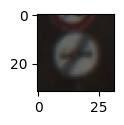

In [ ]:
plt.figure(figsize=(10, 1))
plt.imshow(train_images[4])